In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Getting Data

In [3]:
df = pd.read_csv('Tourist_Travel_Europe.csv')
df.head()

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


# Exploring Data

In [4]:
df.columns

Index(['Tourist_ID', 'Country_Visited', 'City_Visited', 'Mode_of_Travel',
       'Travel_Duration_Days', 'Number_of_Companions', 'Total_Travel_Cost',
       'Accommodation_Type', 'Main_Purpose', 'Season_of_Visit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tourist_ID            1000 non-null   int64 
 1   Country_Visited       1000 non-null   object
 2   City_Visited          1000 non-null   object
 3   Mode_of_Travel        1000 non-null   object
 4   Travel_Duration_Days  1000 non-null   int64 
 5   Number_of_Companions  1000 non-null   int64 
 6   Total_Travel_Cost     1000 non-null   int64 
 7   Accommodation_Type    1000 non-null   object
 8   Main_Purpose          1000 non-null   object
 9   Season_of_Visit       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [6]:
df.shape

(1000, 10)

In [7]:
df.describe()

,Tourist_ID,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.820000,2.983000,2600.376000
std,288.819436,5.489785,1.428549,1393.394815
min,1.000000,2.000000,1.000000,201.000000
25%,250.750000,6.000000,2.000000,1352.250000
50%,500.500000,11.000000,3.000000,2600.500000
75%,750.250000,16.000000,4.000000,3849.500000
max,1000.000000,20.000000,5.000000,4999.000000


# Cleaning Data

### Fixing Columns Name

In [8]:
new_columns = []

for col in df.columns:
    new_name = col.replace('_', '')
    new_columns.append(new_name)
    
df = df.rename(columns=dict(zip(df.columns, new_columns)))
df.columns

Index(['TouristID', 'CountryVisited', 'CityVisited', 'ModeofTravel',
       'TravelDurationDays', 'NumberofCompanions', 'TotalTravelCost',
       'AccommodationType', 'MainPurpose', 'SeasonofVisit'],
      dtype='object')

### Checking Duplicates

In [9]:
df.duplicated().sum()

0

### Deleting Useless Columns

In [10]:
df.drop('TouristID', axis=1, inplace=True)

### Changing Data Types

In [11]:
df[['NumberofCompanions', 'TravelDurationDays']] = df[['NumberofCompanions', 'TravelDurationDays']].astype(np.int8)
df['TotalTravelCost'] = df['TotalTravelCost'].astype(np.int32)

### Encoding

In [12]:
for_encoding = ['CountryVisited', 'CityVisited', 'ModeofTravel', 'AccommodationType', 'MainPurpose']

for column in for_encoding:
    column_name = column + 'Encoded'
    encoder = LabelEncoder()
    df[column_name] = encoder.fit_transform(df[column])
    decoded = encoder.inverse_transform(df[column_name])
    helper = set(zip(df[column_name], decoded))
    print(f'{column}: {helper} \n')
    
seasons = [['Spring', 'Summer', 'Fall', 'Winter']]
encoder = OrdinalEncoder(categories=seasons)
df['SeasonofVisitEncoded'] = encoder.fit_transform(df[['SeasonofVisit']])
decoded = encoder.inverse_transform(df[['SeasonofVisitEncoded']])
helper = set(zip(df['SeasonofVisitEncoded'], decoded.T[0]))
print(f'{'SeasonofVisit'}: {helper}')

df_main = df.drop(df.columns[-6:], axis=1)

CountryVisited: {(6, 'Portugal'), (9, 'UK'), (7, 'Spain'), (3, 'Greece'), (8, 'Switzerland'), (1, 'France'), (0, 'Austria'), (2, 'Germany'), (4, 'Italy'), (5, 'Netherlands')} 

CityVisited: {(27, 'Venice'), (1, 'Athens'), (2, 'Barcelona'), (22, 'Salzburg'), (24, 'Seville'), (16, 'Munich'), (10, 'London'), (11, 'Lucerne'), (29, 'Zurich'), (23, 'Santorini'), (9, 'Lisbon'), (12, 'Lyon'), (26, 'Utrecht'), (3, 'Berlin'), (20, 'Rome'), (28, 'Vienna'), (21, 'Rotterdam'), (17, 'Nice'), (4, 'Edinburgh'), (5, 'Faro'), (18, 'Paris'), (14, 'Manchester'), (25, 'Thessaloniki'), (15, 'Milan'), (13, 'Madrid'), (8, 'Innsbruck'), (19, 'Porto'), (6, 'Geneva'), (0, 'Amsterdam'), (7, 'Hamburg')} 

ModeofTravel: {(0, 'Bicycle'), (4, 'Train'), (3, 'Flight'), (2, 'Car'), (1, 'Bus')} 

AccommodationType: {(1, 'Camping'), (3, 'Hotel'), (2, 'Hostel'), (0, 'Airbnb')} 

MainPurpose: {(0, 'Business'), (2, 'Leisure'), (1, 'Family Visit')} 

SeasonofVisit: {(1.0, 'Summer'), (2.0, 'Fall'), (0.0, 'Spring'), (3.0, 'Wint

### Exploring Cleaned Data 

In [13]:
df.head()

,CountryVisited,CityVisited,ModeofTravel,TravelDurationDays,NumberofCompanions,TotalTravelCost,AccommodationType,MainPurpose,SeasonofVisit,CountryVisitedEncoded,CityVisitedEncoded,ModeofTravelEncoded,AccommodationTypeEncoded,MainPurposeEncoded,SeasonofVisitEncoded
0,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer,2,7,3,3,1,1.0
1,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter,2,3,2,2,1,3.0
2,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter,9,14,0,1,0,3.0
3,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer,3,25,0,3,0,1.0
4,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring,3,25,3,0,2,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CountryVisited            1000 non-null   object 
 1   CityVisited               1000 non-null   object 
 2   ModeofTravel              1000 non-null   object 
 3   TravelDurationDays        1000 non-null   int8   
 4   NumberofCompanions        1000 non-null   int8   
 5   TotalTravelCost           1000 non-null   int32  
 6   AccommodationType         1000 non-null   object 
 7   MainPurpose               1000 non-null   object 
 8   SeasonofVisit             1000 non-null   object 
 9   CountryVisitedEncoded     1000 non-null   int32  
 10  CityVisitedEncoded        1000 non-null   int32  
 11  ModeofTravelEncoded       1000 non-null   int32  
 12  AccommodationTypeEncoded  1000 non-null   int32  
 13  MainPurposeEncoded        1000 non-null   int32  
 14  SeasonofV

In [15]:
sns.set_palette("viridis")
sns.set_style("whitegrid")

# Correlation

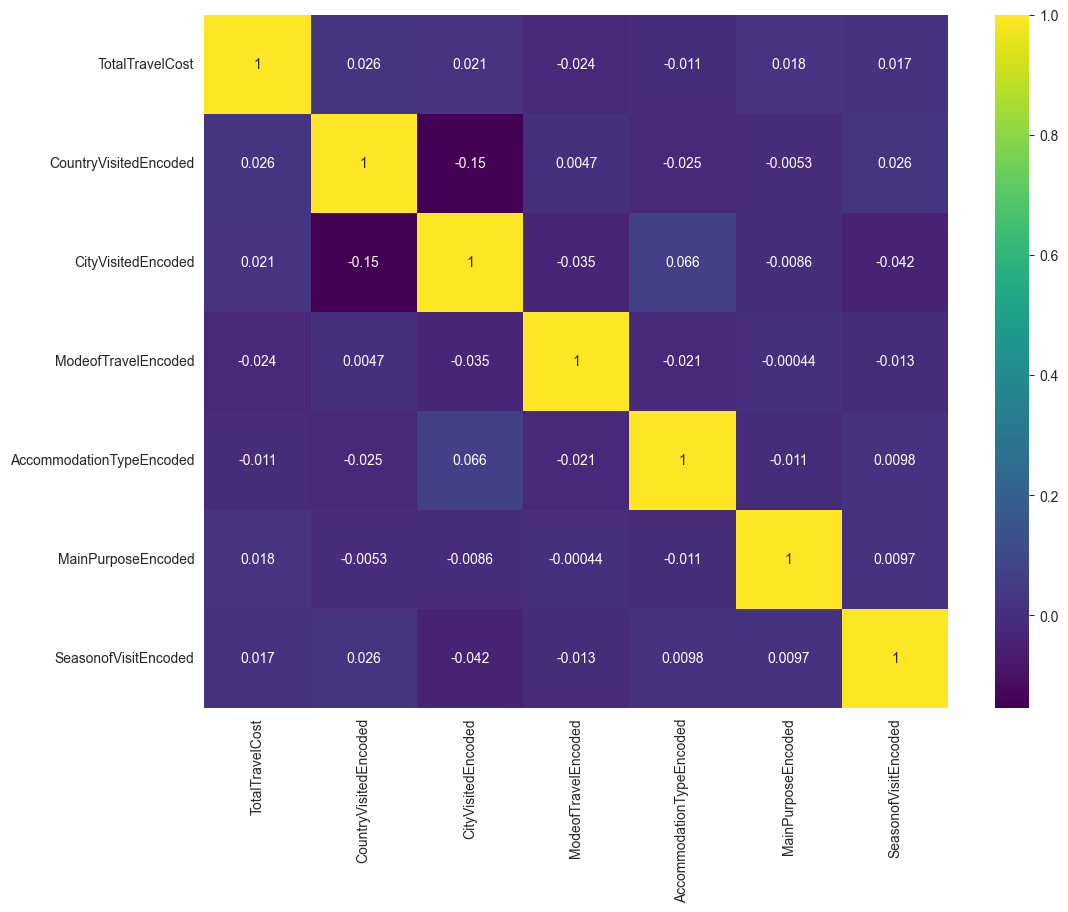

In [16]:
corr = df.select_dtypes(['int', 'float']).corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

# Analysing

### Trip Count for Each Season and Country

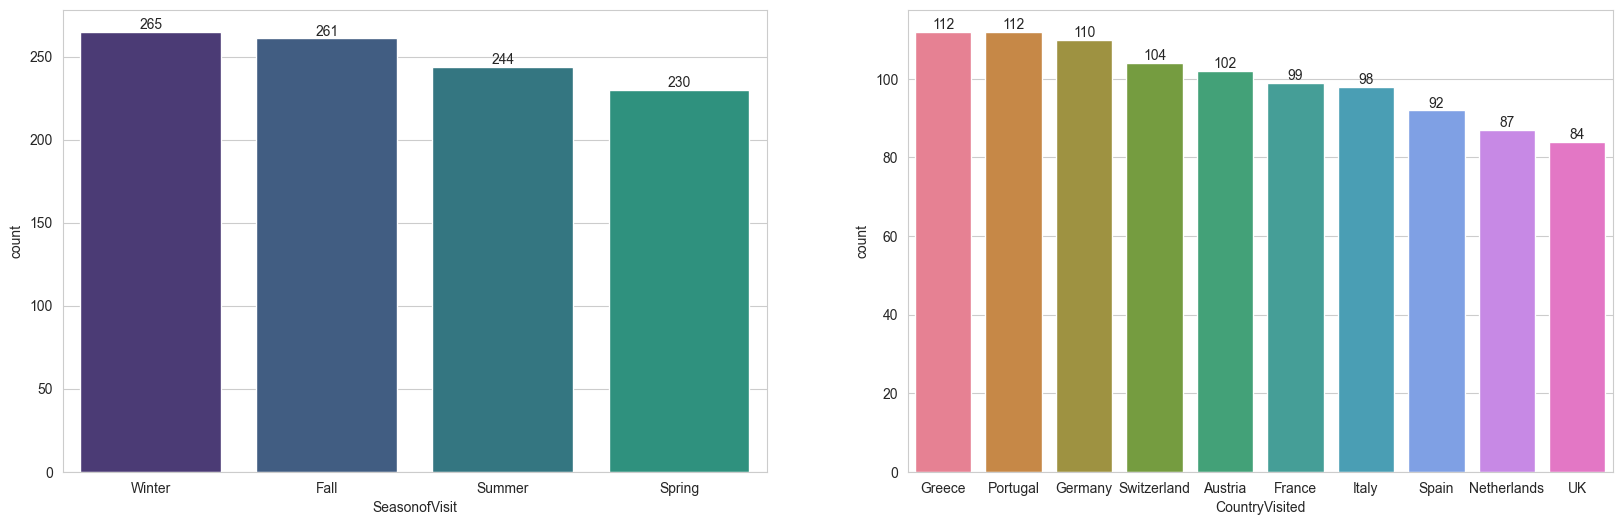

In [31]:
season_count = df['SeasonofVisit'].value_counts().reset_index()
country_count = df['CountryVisited'].value_counts().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

ax = sns.barplot(ax=axs[0], data=season_count, x='SeasonofVisit', y='count', hue='SeasonofVisit')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

ax1 = sns.barplot(ax=axs[1], data=country_count, x='CountryVisited', y='count', hue='CountryVisited')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=10)

plt.show()

### Average Trip Duration for Each Country and Season

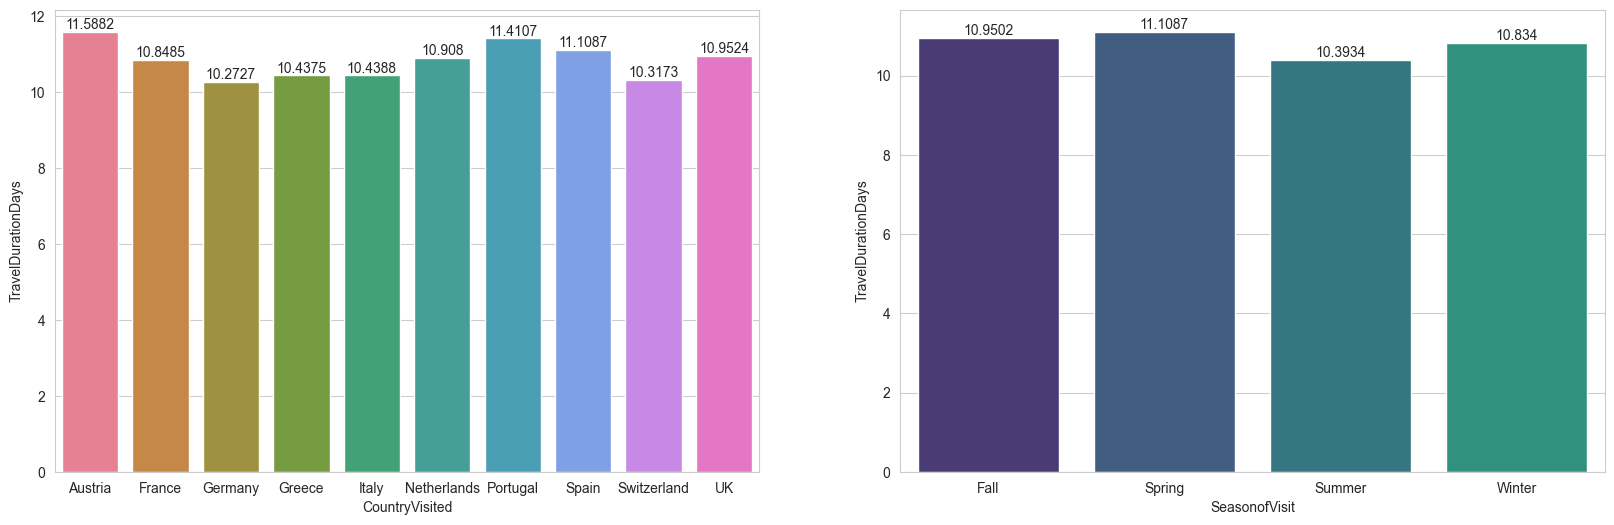

In [18]:
duration_per_country = df.groupby(['CountryVisited'])['TravelDurationDays'].mean().reset_index()
duration_per_season = df.groupby(['SeasonofVisit'])['TravelDurationDays'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

ax = sns.barplot(ax=axs[0] ,data=duration_per_country, x='CountryVisited', y='TravelDurationDays', hue='CountryVisited')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

ax1 = sns.barplot(ax=axs[1] ,data=duration_per_season, x='SeasonofVisit', y='TravelDurationDays', hue='SeasonofVisit')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=10)
    
plt.show()

### Count of Each Mode of Travel

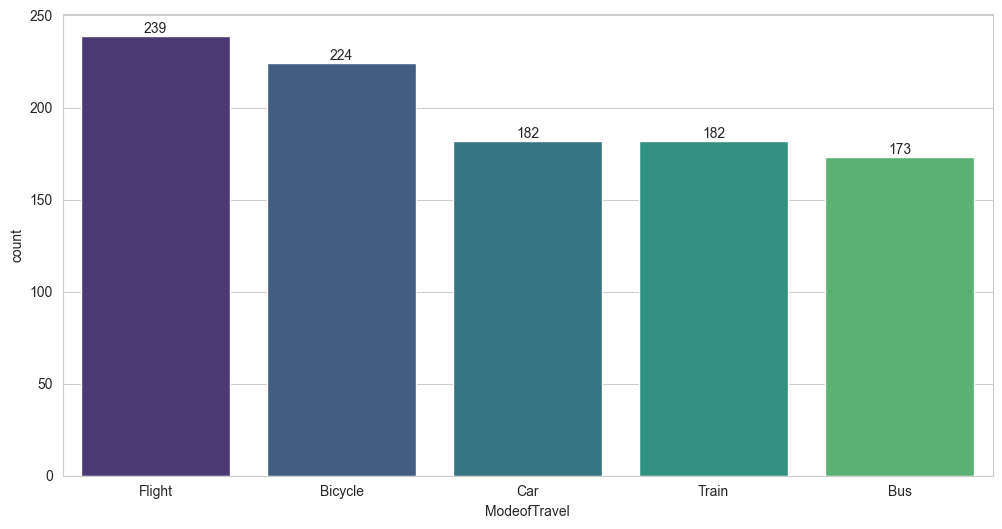

In [19]:
travel_mode_count = df['ModeofTravel'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(travel_mode_count, x='ModeofTravel', y='count', hue='ModeofTravel')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
    
plt.show()

### Total and Average Money Spent in Each Season and Country

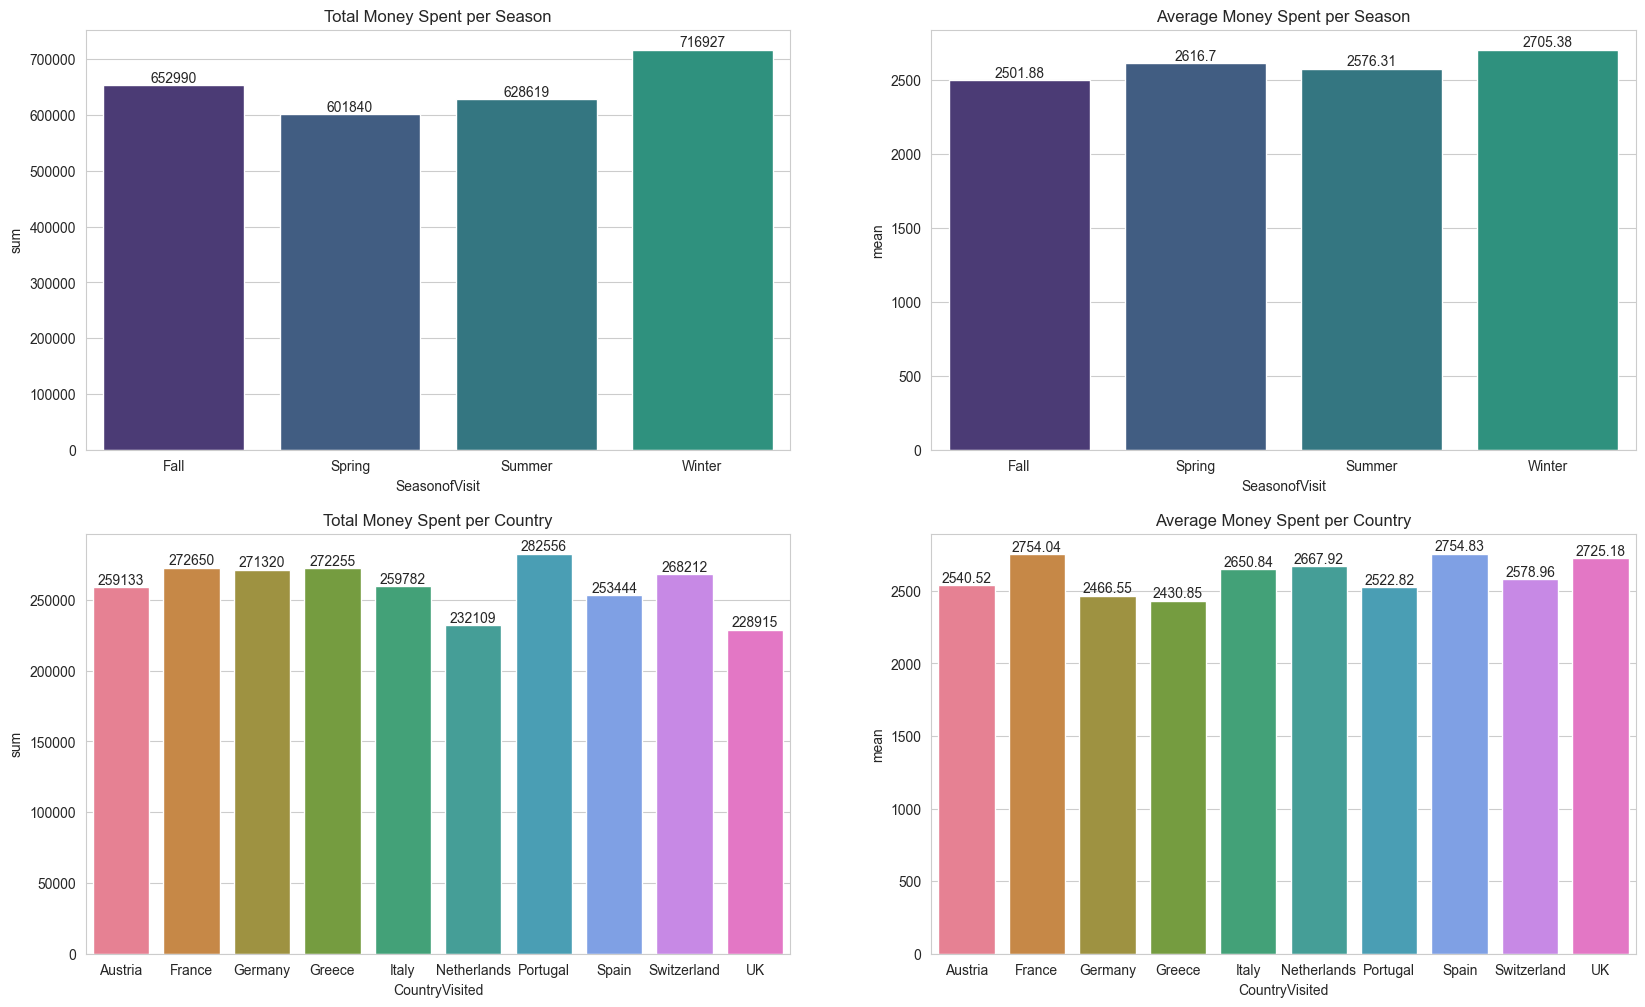

In [20]:
total_money_per_season = df.groupby('SeasonofVisit')['TotalTravelCost'].agg(['sum', 'mean']).reset_index()
total_money_per_country = df.groupby('CountryVisited')['TotalTravelCost'].agg(['sum', 'mean']).reset_index()

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

ax = sns.barplot(ax=axs[0, 0] ,data=total_money_per_season, x='SeasonofVisit', y='sum', hue='SeasonofVisit')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
axs[0, 0].set_title('Total Money Spent per Season')

ax1 = sns.barplot(ax=axs[0, 1] ,data=total_money_per_season, x='SeasonofVisit', y='mean', hue='SeasonofVisit')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=10)
axs[0, 1].set_title('Average Money Spent per Season')
    
ax2 = sns.barplot(ax=axs[1, 0] ,data=total_money_per_country, x='CountryVisited', y='sum', hue='CountryVisited')
for i in ax2.containers:
    ax2.bar_label(i, fontsize=10)
axs[1, 0].set_title('Total Money Spent per Country')

ax3 = sns.barplot(ax=axs[1, 1] ,data=total_money_per_country, x='CountryVisited', y='mean', hue='CountryVisited')
for i in ax3.containers:
    ax3.bar_label(i, fontsize=10)
axs[1, 1].set_title('Average Money Spent per Country')
    
plt.show()

### Count of Each Type of Accommodation

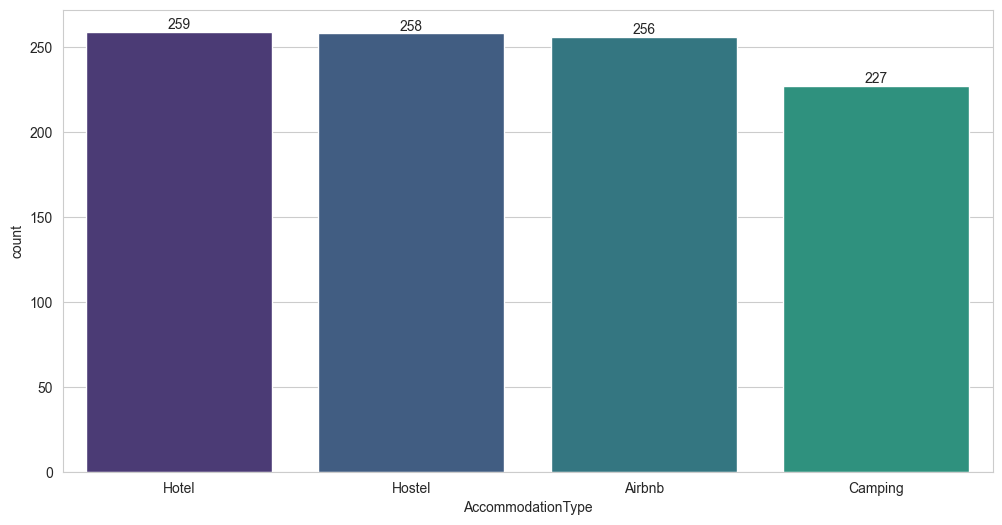

In [21]:
accommodation_count = df['AccommodationType'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(accommodation_count, x='AccommodationType', y='count', hue='AccommodationType')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
    
plt.show()

### Count of Each Number of Companions

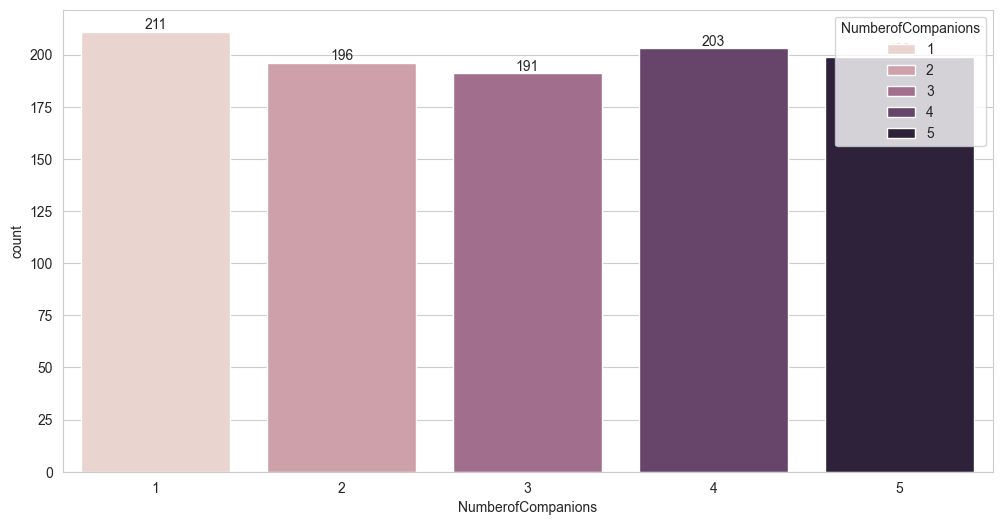

In [22]:
companions_count = df['NumberofCompanions'].value_counts().reset_index().sort_values(by='NumberofCompanions')

plt.figure(figsize=(12, 6))
ax = sns.barplot(companions_count, x='NumberofCompanions', y='count', hue='NumberofCompanions')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
    
plt.show()

### Trip Count for Each Country per Season

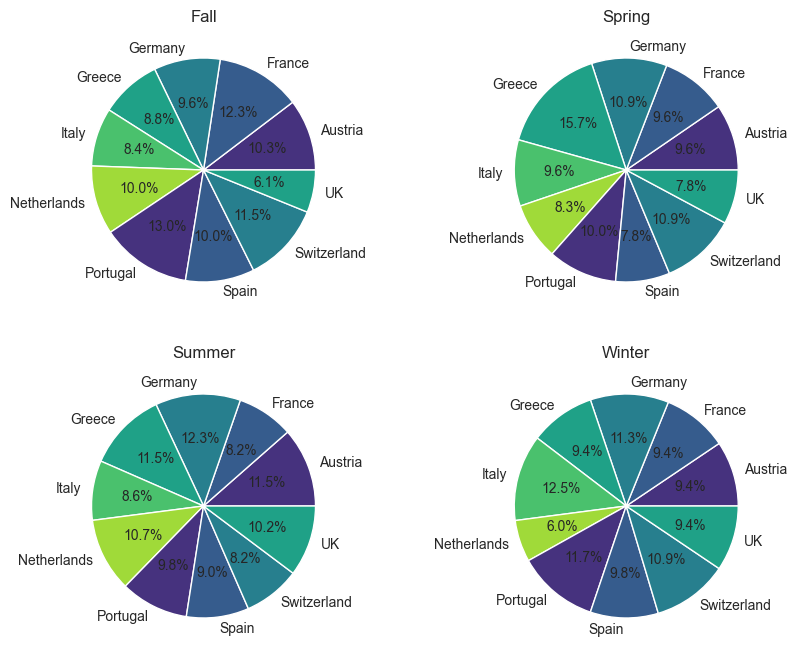

In [23]:
season_counts_per_country = df.groupby(['SeasonofVisit', 'CountryVisited']).size().reset_index(name='Trips')
seasons = season_counts_per_country['SeasonofVisit'].unique()

rows = 2
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))

for i, season in enumerate(seasons):
    season_data = season_counts_per_country[season_counts_per_country['SeasonofVisit'] == season]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(season_data['Trips'], labels=season_data['CountryVisited'], autopct='%1.1f%%')
    axs[row, col].set_title(season)
        
plt.show()

__Explanation__: <br>
Most Traveled Countries in Each Season
<ul>
    <li>Spring: Greence</li>
    <li>Summer: Germany, Austria and Greece</li>
    <li>Fall: Portugal and Frence</li>
    <li>Winter: Itay, Portugal and Germany is close</li>
</ul>

Least Traveled Countries in Each Season
<ul>
    <li>Spring: UK and Spain</li>
    <li>Summer: SwitzerLand and France, Italy is close</li>
    <li>Fall: UK</li>
    <li>Winter: Netherland</li>
</ul>

Greece sees the most travel in spring and the least in winter. Travel to Germany remains relatively consistent across all seasons. Switzerland experiences the least travel in summer. Portugal has similar travel numbers in spring, summer, and winter, with a slight difference in fall. Austria's travel numbers are fairly consistent across all seasons. In France, most travel occurs in fall, with noticeable differences in other seasons. Italy sees the most travel in winter, with variations in other seasons. The Netherlands has the least travel in winter, with only a small difference in other seasons. In Spain, travel is fairly consistent, with a slight difference in spring. The UK experiences the most travel in summer and winter, with the least in spring and fall.

### Trip Duration in Each Season for Every Country

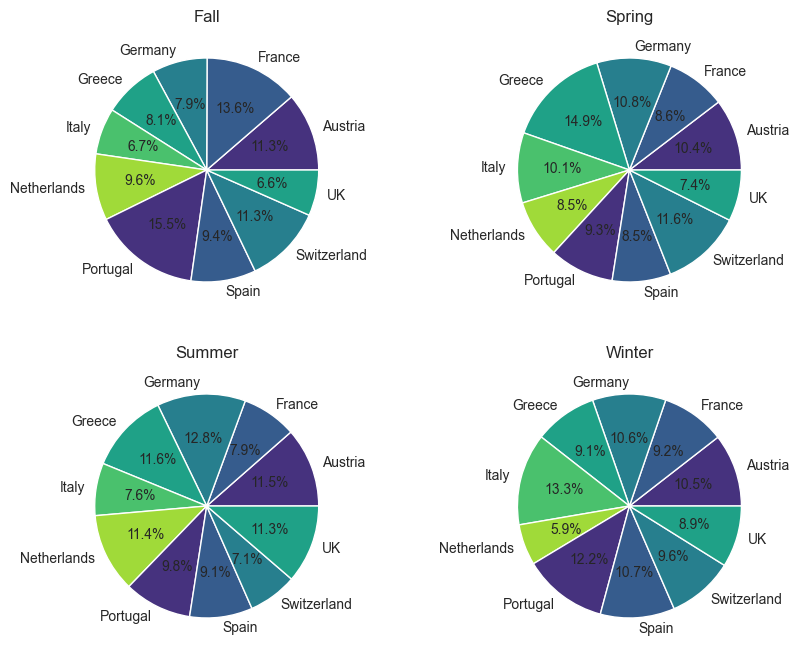

In [24]:
dur_per_country_each_season = df.groupby(['SeasonofVisit', 'CountryVisited'])['TravelDurationDays'].sum().reset_index()
seasons = dur_per_country_each_season['SeasonofVisit'].unique()

rows = 2
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))

for i, season in enumerate(seasons):
    season_data = dur_per_country_each_season[dur_per_country_each_season['SeasonofVisit'] == season]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(season_data['TravelDurationDays'], labels=season_data['CountryVisited'], autopct='%1.1f%%')
    axs[row, col].set_title(season)
        
plt.show()

__Explanation__: <br>
Highest Trip Duration in Each Season
<ul>
    <li>Spring: Greence</li>
    <li>Summer: Germany</li>
    <li>Fall: Portugal and Frence</li>
    <li>Winter: Germany</li>
</ul>

Least Trip Duration in Each Season
<ul>
    <li>Spring: UK</li>
    <li>Summer: SwitzerLand</li>
    <li>Fall: UK</li>
    <li>Winter: Netherland</li>
</ul>

### Number of Companions Count for Each Accommodation Type

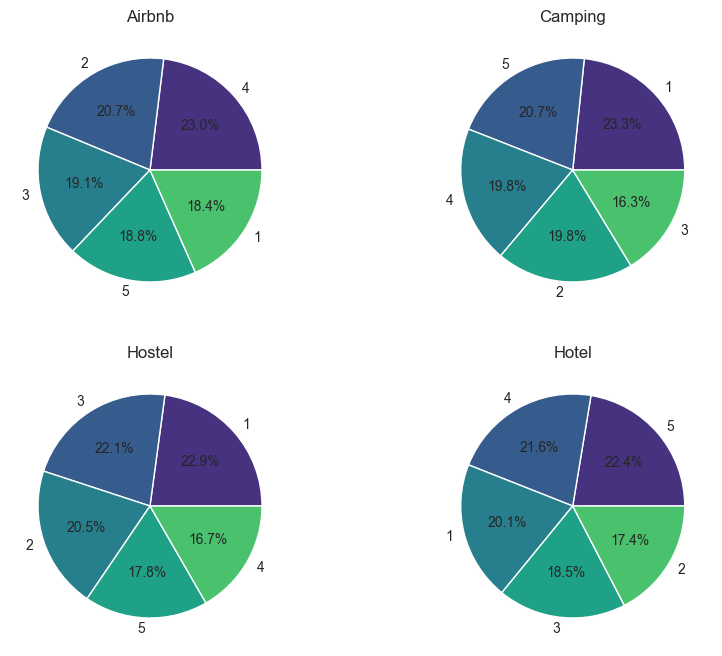

In [25]:
companions_count_per_country = df.groupby('AccommodationType')['NumberofCompanions'].value_counts().reset_index()
accommodations = companions_count_per_country['AccommodationType'].unique()

rows = 2
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))

for i, accommodation in enumerate(accommodations):
    country_data = companions_count_per_country[companions_count_per_country['AccommodationType'] == accommodation]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(country_data['count'], labels=country_data['NumberofCompanions'], autopct='%1.1f%%')
    axs[row, col].set_title(accommodation)
        
plt.show()

__Explanation__: <br>

Preferred Accommodation Type for Each Number of Companions
<ul>
    <li>Hotel: 4</li>
    <li>Hostel: 3 and 1</li>
    <li>Airbnb: 5</li>
    <li>Camping: 1</li>
</ul>

### Trip Percentage for Each City in Every Country

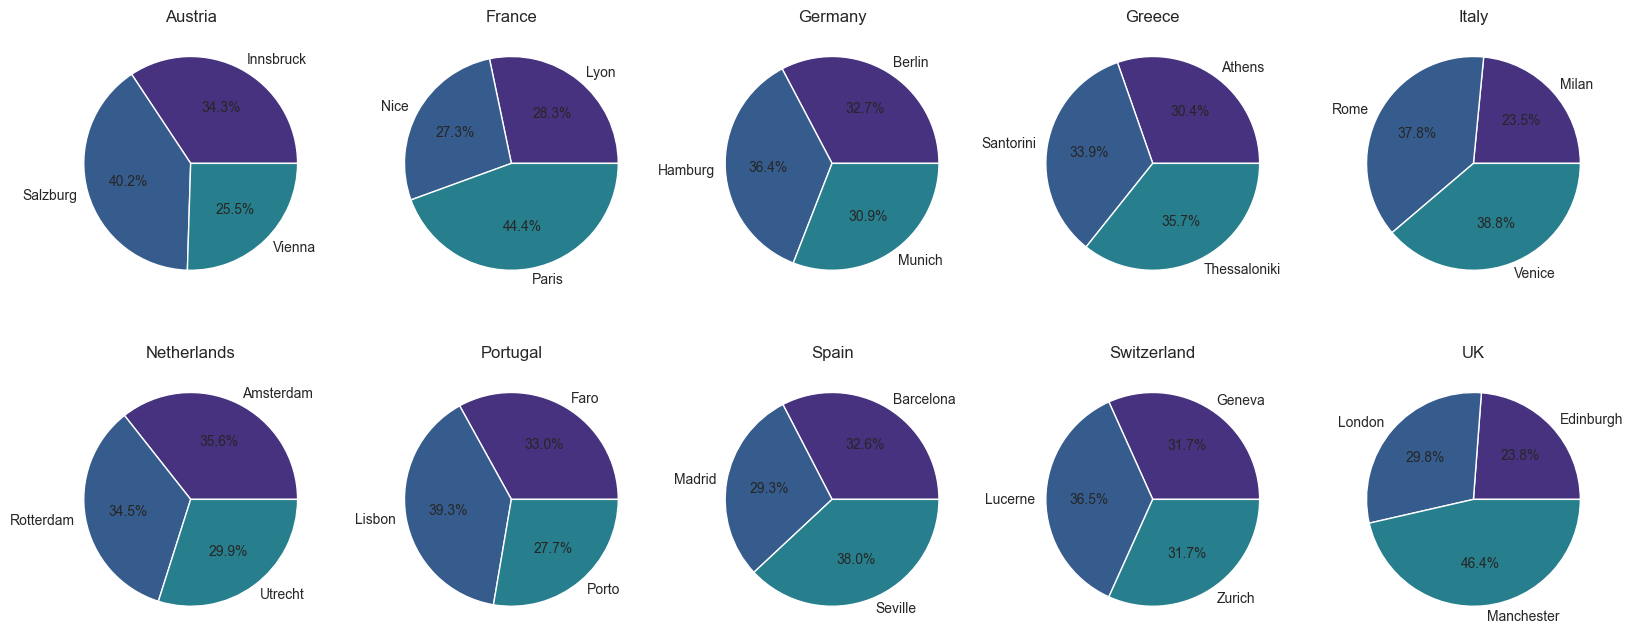

In [26]:
city_counts_per_country = df.groupby(['CountryVisited', 'CityVisited']).size().reset_index(name='Trips')
countries = city_counts_per_country['CountryVisited'].unique()

rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20, 8))

for i, country in enumerate(countries):
    country_data = city_counts_per_country[city_counts_per_country['CountryVisited'] == country]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(country_data['Trips'], labels=country_data['CityVisited'], autopct='%1.1f%%')
    axs[row, col].set_title(country)
        
plt.show()

__Explanation__: <br> 

Most Traveled Cities in Each Country <br>

<ul>
    <li>Austria: Salzburg</li>
    <li>France: Paris</li>
    <li>Germany: Hamburg </li>
    <li>Greece: Thessaloniki and Santorini is close</li>
    <li>Italy: Venice</li>
    <li>Netherlands: Amsterdam and Rotterdam</li>
    <li>Portugal: Lisbon</li>
    <li>Spain: Seville</li>
    <li>Switzerland: Lucerne</li>
    <li>UK: Manchester</li>
</ul>
Least Traveled Cities in Each Country

<ul>
    <li>Austria: Vienna</li>
    <li>France: Nice</li>
    <li>Germany: Munich </li>
    <li>Greece: Athens</li>
    <li>Italy: Milan</li>
    <li>Netherlands: Utrecht</li>
    <li>Portugal: Porto</li>
    <li>Spain: Madrid</li>
    <li>Switzerland: Geneva and Zurich</li>
    <li>UK: Edinburgh</li>
</ul>

There is a big difference between Salzburg and other cities in Austria. In France, Paris shows a significant difference compared to other cities. In Greece, Thessaloniki and Santorini are quite close to each other. In the Netherlands, Amsterdam and Rotterdam are similar, but there's a large difference with Utrecht. In Portugal, Porto has a significant difference compared to other cities. In Spain, there is a notable difference between Madrid and Seville. In Switzerland, the cities are fairly close to each other. In the UK, there is a very big difference between Manchester and the other cities.

### Average Trip Duration Percentage in Each City for Every Country

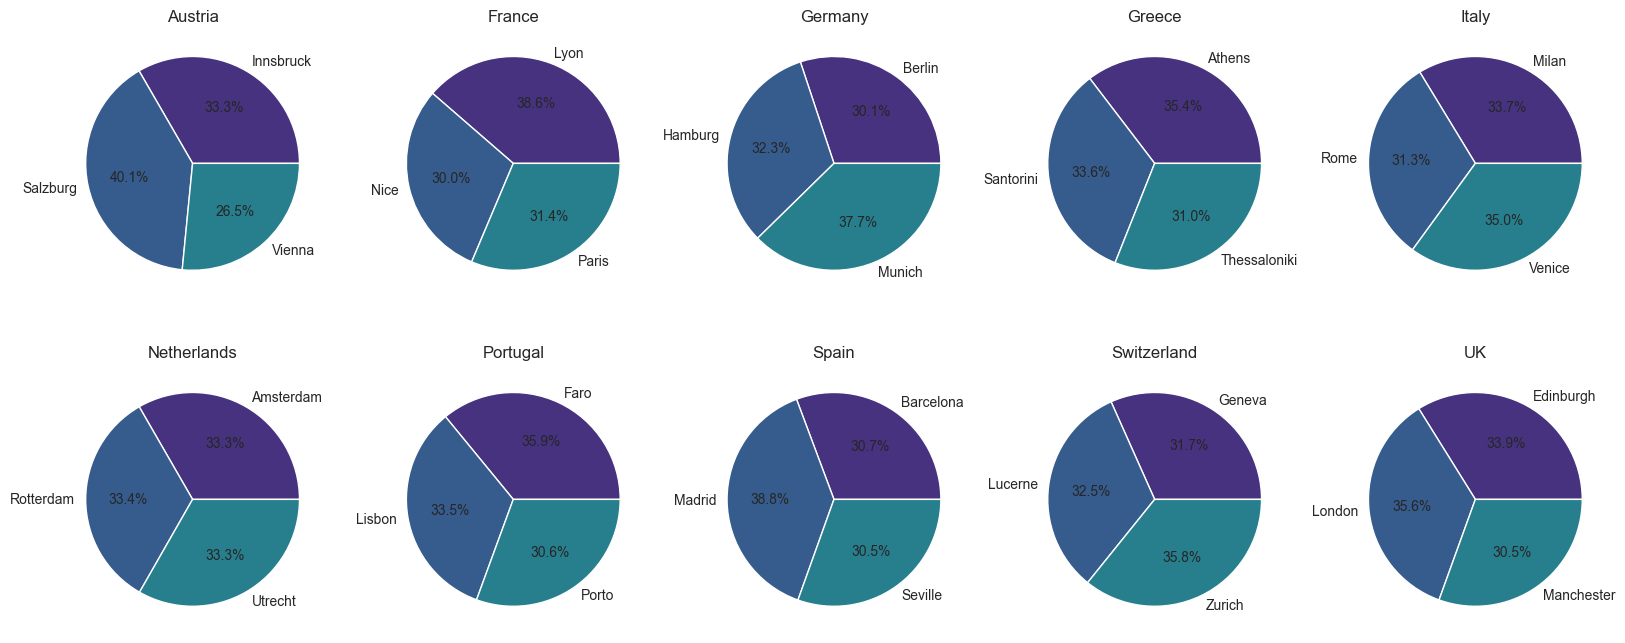

In [27]:
duration_per_city = df.groupby(['CountryVisited', 'CityVisited'])['TravelDurationDays'].mean().reset_index()
countries = duration_per_city['CountryVisited'].unique()

rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20, 8))

for i, country in enumerate(countries):
    duration_data = duration_per_city[duration_per_city['CountryVisited'] == country]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(duration_data['TravelDurationDays'], labels=duration_data['CityVisited'], autopct='%1.1f%%')
    axs[row, col].set_title(country)
        
plt.show()

__Explanation__: <br>

Highest Average Trip Duration in Cities of Each Country
<ul>
    <li>Austria: Salzburg</li>
    <li>France: Lyon</li>
    <li>Germany: Munich </li>
    <li>Greece: Athens</li>
    <li>Italy: Venice</li>
    <li>Netherlands: Rotterdam and Amsterdam</li>
    <li>Portugal: Faro</li>
    <li>Spain: Madrid</li>
    <li>Switzerland: Zurich</li>
    <li>UK: London</li>
</ul>

Lowest Average Trip Duration in Cities of Each Country
<ul>
    <li>Austria: Vienna</li>
    <li>France: Nice</li>
    <li>Germany: Berlin </li>
    <li>Greece: Thessaloniki</li>
    <li>Italy: Rome</li>
    <li>Netherlands: Utrecht</li>
    <li>Portugal: Seville and Barcelona</li>
    <li>Spain: Madrid</li>
    <li>Switzerland: Geneva</li>
    <li>UK: Manchester</li>
</ul>

### Travel Modes Count for Each Country

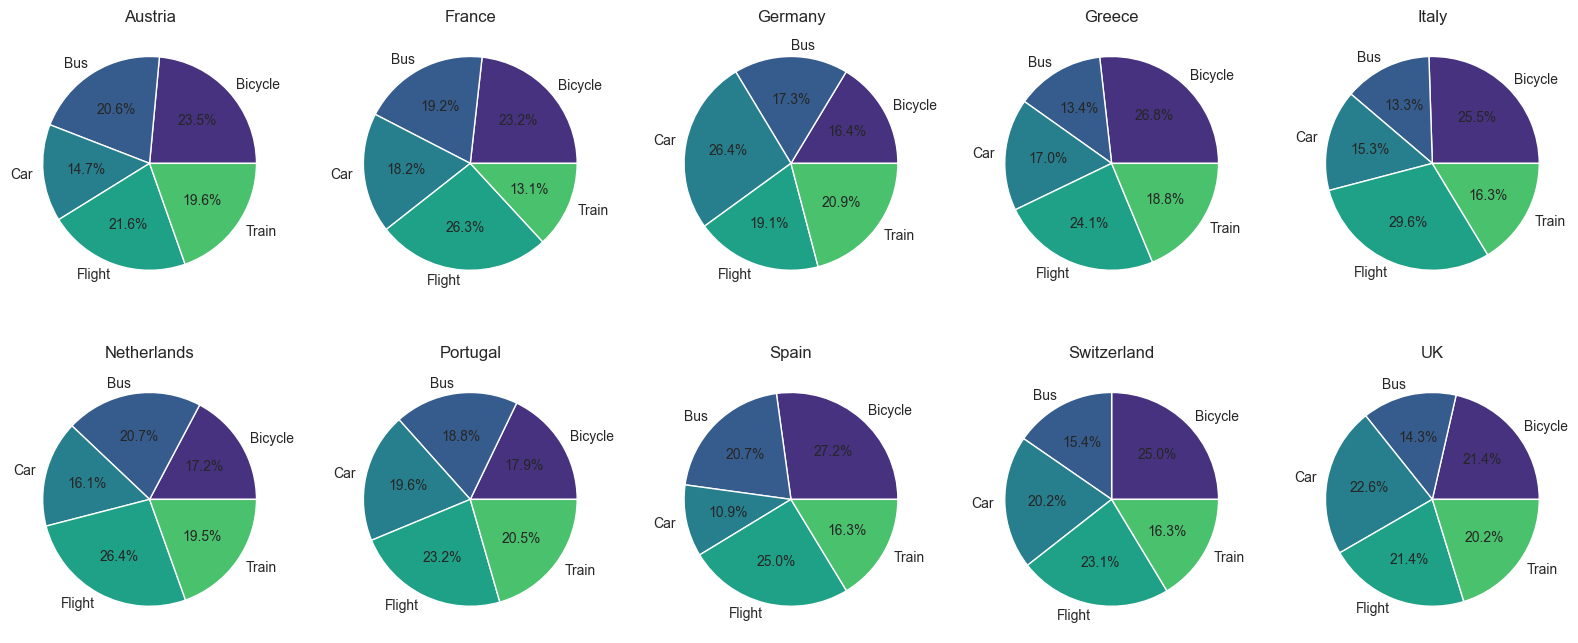

In [28]:
travel_mode_for_country = df.groupby(['CountryVisited', 'ModeofTravel']).size().reset_index(name='count')
countries = travel_mode_for_country['CountryVisited'].unique()

rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20, 8))

for i, country in enumerate(countries):
    country_data = travel_mode_for_country[travel_mode_for_country['CountryVisited'] == country]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(country_data['count'], labels=country_data['ModeofTravel'], autopct='%1.1f%%')
    axs[row, col].set_title(country)
        
plt.show()

__Explanation__: <br>

Preferred Mode of Travel for Every Country
<ul>
    <li>Austria: Bicycle</li>
    <li>France: Flight</li>
    <li>Germany: Car</li>
    <li>Greece: Bicycle</li>
    <li>Italy: Flight</li>
    <li>Netherlands: Flight</li>
    <li>Portugal: Flight</li>
    <li>Spain: Bicycle</li>
    <li>Switzerland: Bicycle</li>
    <li>UK: Car</li>
</ul>

### Total Money Spent Percentage in Each City for Every Country

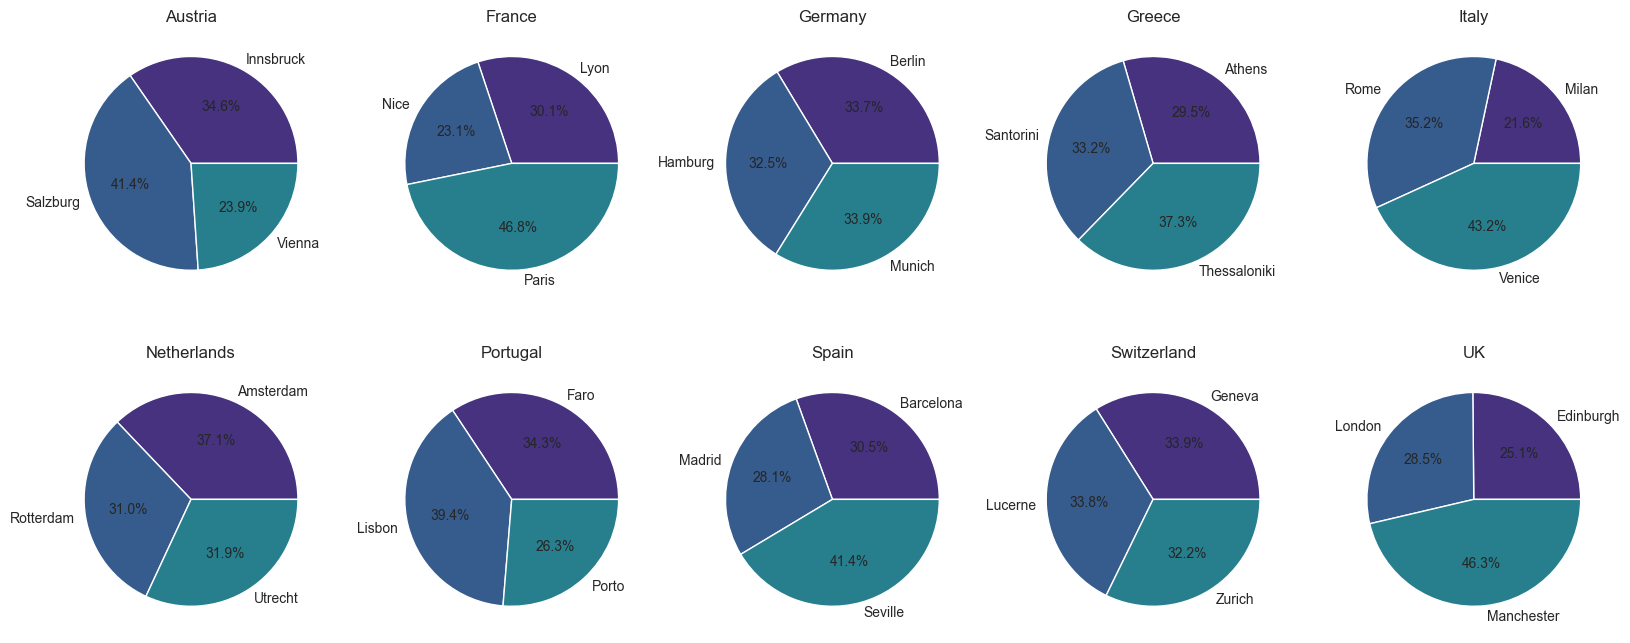

In [29]:
money_spent_each_city = df.groupby(['CountryVisited', 'CityVisited'])['TotalTravelCost'].sum().reset_index()
countries = money_spent_each_city['CountryVisited'].unique()

rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20, 8))

for i, country in enumerate(countries):
    country_data = money_spent_each_city[money_spent_each_city['CountryVisited'] == country]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(country_data['TotalTravelCost'], labels=country_data['CityVisited'], autopct='%1.1f%%')
    axs[row, col].set_title(country)
        
plt.show()

__Explanation__: <br>

Total Money Spent in Cities of Each Country
<ul>
    <li>Austria: Salzburg</li>
    <li>France: Paris</li>
    <li>Germany: Munich and Berlin</li>
    <li>Greece: Thessaloniki</li>
    <li>Italy: Venice</li>
    <li>Netherlands: Amsterdam</li>
    <li>Portugal: Lisbon</li>
    <li>Spain: Seville</li>
    <li>Switzerland: Geneva and Lucerne</li>
    <li>UK: Manchester</li>
</ul>

Lowest Money Spent in Cities of Each Country
<ul>
    <li>Austria: Vienna</li>
    <li>France: Nice</li>
    <li>Germany: Hamburg </li>
    <li>Greece: Athens</li>
    <li>Italy: Milan</li>
    <li>Netherlands: Rotterdam</li>
    <li>Portugal: Porto</li>
    <li>Spain: Madrid</li>
    <li>Switzerland: Zurich</li>
    <li>UK: Edinburgh</li>
</ul>

### Travel Reason Count for Each Country

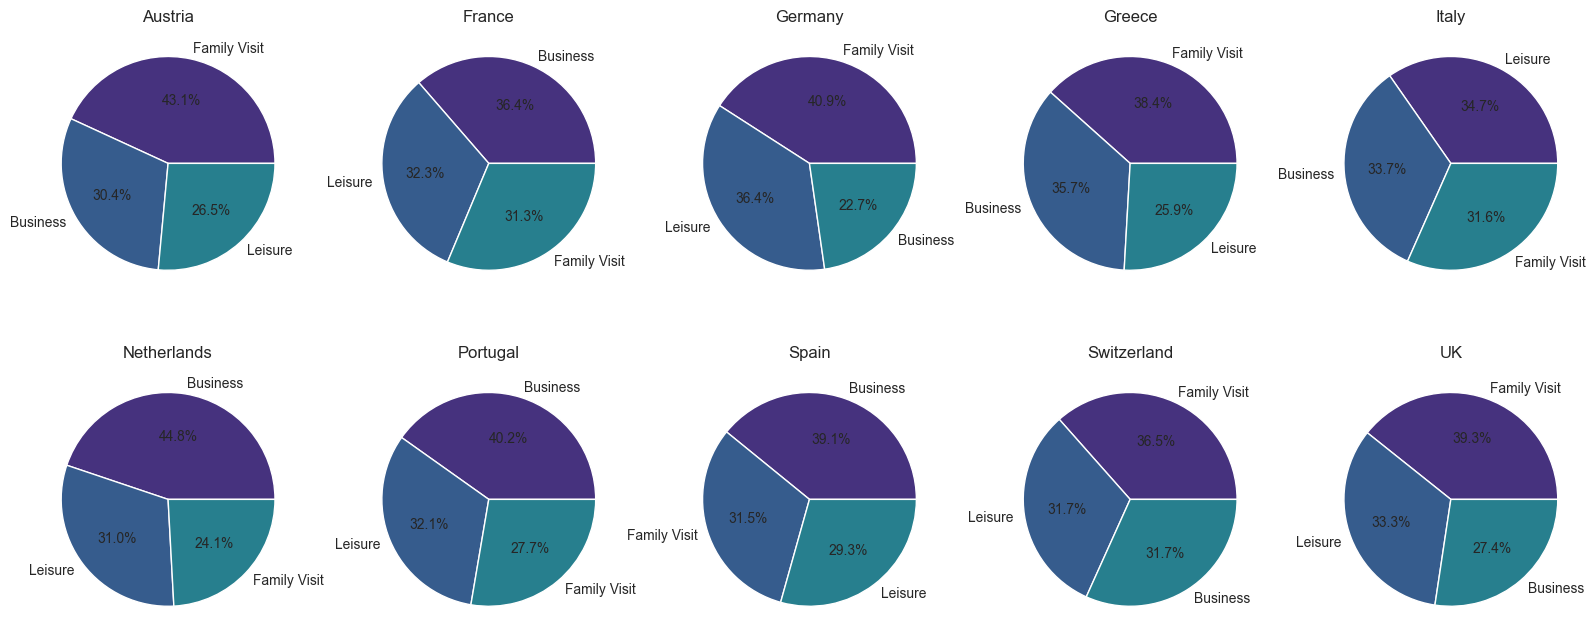

In [30]:
reason_count_per_country = df.groupby('CountryVisited')['MainPurpose'].value_counts().reset_index()
countries = reason_count_per_country['CountryVisited'].unique()

rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(20, 8))

for i, country in enumerate(countries):
    country_data = reason_count_per_country[reason_count_per_country['CountryVisited'] == country]
    
    row = i // cols
    col = i % cols
    
    ax = axs[row, col].pie(country_data['count'], labels=country_data['MainPurpose'], autopct='%1.1f%%')
    axs[row, col].set_title(country)
        
plt.show()

__Explanation__: <br>

Main Reason for Travel to Each Country
<ul>
    <li>Austria: Family Visit</li>
    <li>France: Business</li>
    <li>Germany: Family Visit</li>
    <li>Greece: Family Visit</li>
    <li>Italy: Leisure</li>
    <li>Netherlands: Business</li>
    <li>Portugal: Business</li>
    <li>Spain: Business</li>
    <li>Switzerland: Family Visit</li>
    <li>UK: Family Visit</li>
</ul>